In [1]:
# Import libraries

import pandas as pd
import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
plt.style.use('ggplot')
from matplotlib.pyplot import figure

%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)

pd.options.mode.chained_assignment = None

# Reading in the data
df = pd.read_csv(r'C:\Users\Sulav\Desktop\Python\movies.csv')

In [2]:
#Looking at the data

df.head()

,name,rating,genre,year,released,score,votes,director,writer,star,country,budget,gross,company,runtime
0,The Shining,R,Drama,1980,"June 13, 1980 (United States)",8.4,927000.0,Stanley Kubrick,Stephen King,Jack Nicholson,United Kingdom,19000000.0,46998772.0,Warner Bros.,146.0
1,The Blue Lagoon,R,Adventure,1980,"July 2, 1980 (United States)",5.8,65000.0,Randal Kleiser,Henry De Vere Stacpoole,Brooke Shields,United States,4500000.0,58853106.0,Columbia Pictures,104.0
2,Star Wars: Episode V - The Empire Strikes Back,PG,Action,1980,"June 20, 1980 (United States)",8.7,1200000.0,Irvin Kershner,Leigh Brackett,Mark Hamill,United States,18000000.0,538375067.0,Lucasfilm,124.0
3,Airplane!,PG,Comedy,1980,"July 2, 1980 (United States)",7.7,221000.0,Jim Abrahams,Jim Abrahams,Robert Hays,United States,3500000.0,83453539.0,Paramount Pictures,88.0
4,Caddyshack,R,Comedy,1980,"July 25, 1980 (United States)",7.3,108000.0,Harold Ramis,Brian Doyle-Murray,Chevy Chase,United States,6000000.0,39846344.0,Orion Pictures,98.0


In [13]:
# To see any missing data

for col in df.columns:
    pct_missing = np.mean(df[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

name - 0%
rating - 1%
genre - 0%
year - 0%
released - 0%
score - 0%
votes - 0%
director - 0%
writer - 0%
star - 0%
country - 0%
budget - 28%
gross - 2%
company - 0%
runtime - 0%


In [14]:
# Data type for columns

print(df.dtypes)

name         object
rating       object
genre        object
year          int64
released     object
score       float64
votes       float64
director     object
writer       object
star         object
country      object
budget      float64
gross       float64
company      object
runtime     float64
dtype: object


In [18]:
#

df['budget'] = pd.to_numeric(df['budget'], errors='coerce').fillna(0).astype(int)
df['gross'] = pd.to_numeric(df['gross'], errors='coerce').fillna(0).astype(int) 
df['votes'] = pd.to_numeric(df['votes'], errors='coerce').fillna(0).astype(int)



In [22]:
#
pd.set_option('display.max_rows', None)

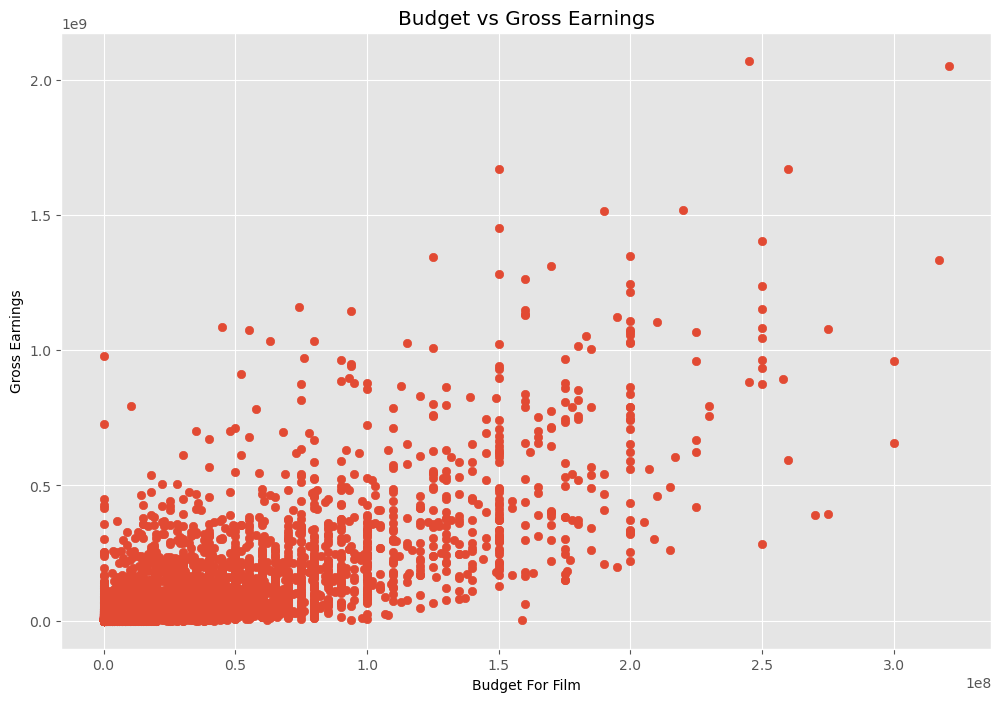

In [27]:
# Scatter plot with budget vs gross

# Filtering out negative budget and gross values

filtered_data = df[(df['budget'] >= 0) & (df['gross'] >= 0)]

plt.scatter(x=filtered_data['budget'], y=filtered_data['gross'])
plt.title('Budget vs Gross Earnings')
plt.xlabel('Budget For Film')
plt.ylabel('Gross Earnings')
plt.show()


<Axes: xlabel='budget', ylabel='gross'>

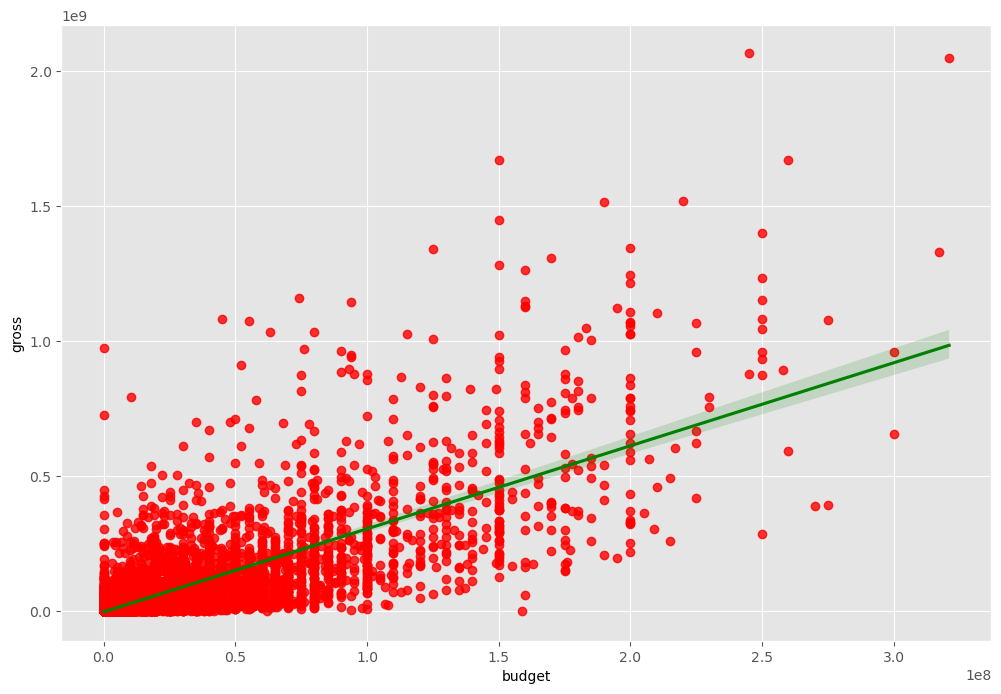

In [33]:
#
sns.regplot(x='budget',y='gross',data=filtered_data, scatter_kws={"color": "red"}, line_kws={"color":"green"})

C:\Users\Sulav\AppData\Local\Temp\ipykernel_7868\3215876228.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = filtered_data.corr()


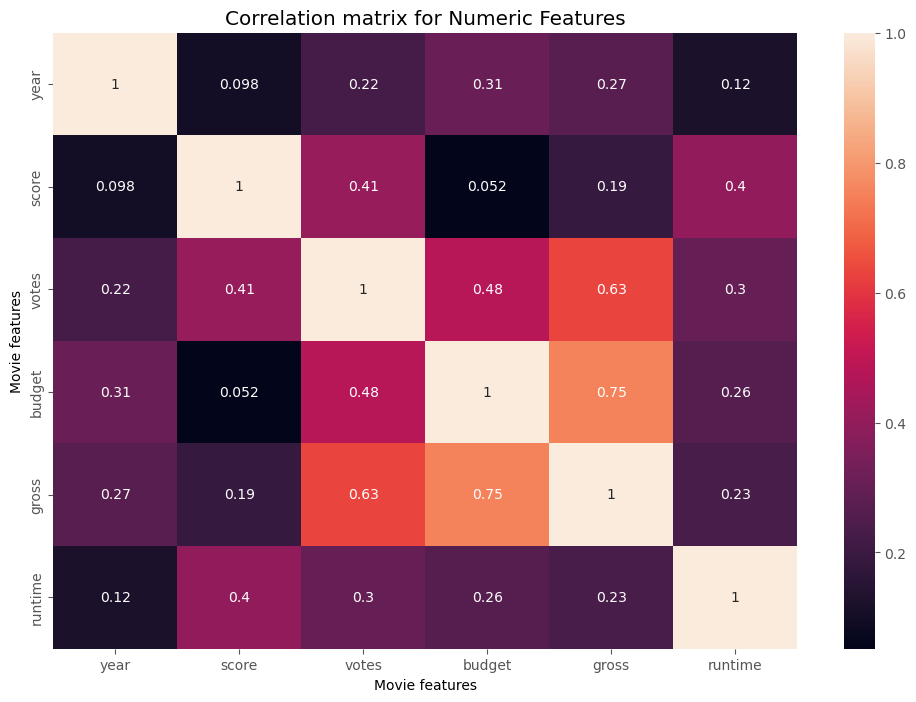

In [37]:
correlation_matrix = filtered_data.corr()

sns.heatmap(correlation_matrix, annot = True)

plt.title("Correlation matrix for Numeric Features")

plt.xlabel("Movie features")

plt.ylabel("Movie features")

plt.show()